In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [18]:
emails = pd.read_csv('/Users/atharvakhodke/Documents/PICT/PICT BE sem 7/lab submitions/practice/kishanlal/ML/datasets/email.csv')


In [19]:
emails

Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  \
0        Email 1    0   0    1    0    0   0    2    0    0  ...         0   
1        Email 2    8  13   24    6    6   2  102    1   27  ...         0   
2        Email 3    0   0    1    0    0   0    8    0    0  ...         0   
3        Email 4    0   5   22    0    5   1   51    2   10  ...         0   
4        Email 5    7   6   17    1    5   2   57    0    9  ...         0   
...          ...  ...  ..  ...  ...  ...  ..  ...  ...  ...  ...       ...   
5167  Email 5168    2   2    2    3    0   0   32    0    0  ...         0   
5168  Email 5169   35  27   11    2    6   5  151    4    3  ...         0   
5169  Email 5170    0   0    1    1    0   0   11    0    0  ...         0   
5170  Email 5171    2   7    1    0    2   1   28    2    0  ...         0   
5171  Email 5172   22  24    5    1    6   5  148    8    2  ...         0   

      jay  valued  lay  infrastructure  military  allowing  ff  dry  \
0       0       0    0               0         0         0   0    0   
1       0       0    0               0         0         0   1    0   
2       0       0    0               0         0         0   0    0   
3       0       0    0               0         0         0   0    0   
4       0       0    0               0         0         0   1    0   
...   ...     ...  ...             ...       ...       ...  ..  ...   
5167    0       0    0               0         0         0   0    0   
5168    0       0    0               0         0         0   1    0   
5169    0       0    0               0         0         0   0    0   
5170    0       0    0               0         0         0   1    0   
5171    0       0    0               0         0         0   0    0   

      Prediction  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
5167           0  
5168           0  
5169           1  
5170           1  
5171           0  

[5172 rows x 3002 columns]

In [20]:
emails.columns

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

In [21]:
# if the data contains text in single col
# tfidf = TfidfVectorizer(stop_words='english', max_features=3000)
# X = tfidf.fit_transform(emails['text']).toarray()
# y = emails['label']

In [22]:
# split input and output data
x = emails.drop(["Email No.", "Prediction"], axis=1)
y = emails["Prediction"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [24]:
# Train and Evaluate KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


In [29]:
# Train and Evaluate SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [30]:
# Metrics
def print_metrics(y_test, y_pred, model_name):
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

print_metrics(y_test, y_pred_knn, "K-Nearest Neighbors")
print_metrics(y_test, y_pred_svm, "Support Vector Machine")

K-Nearest Neighbors Performance:
Accuracy: 0.8628019323671497
Precision: 0.7251461988304093
Recall: 0.8378378378378378
F1 Score: 0.7774294670846394
Confusion Matrix:
[[645  94]
 [ 48 248]]

Support Vector Machine Performance:
Accuracy: 0.8173913043478261
Precision: 0.9083969465648855
Recall: 0.40202702702702703
F1 Score: 0.5573770491803278
Confusion Matrix:
[[727  12]
 [177 119]]



In [ ]:
# K-Nearest Neighbors Performance:
# True Positives (TP): 248 (Correctly identified as spam)
# True Negatives (TN): 645 (Correctly identified as not spam)
# False Positives (FP): 94 (Incorrectly identified as spam)
# False Negatives (FN): 48 (Incorrectly identified as not spam)


# Support Vector Machine Performance:
# True Positives (TP): 119 (Correctly identified as spam)
# True Negatives (TN): 727 (Correctly identified as not spam)
# False Positives (FP): 12 (Incorrectly identified as spam)
# False Negatives (FN): 177 (Incorrectly identified as not spam)

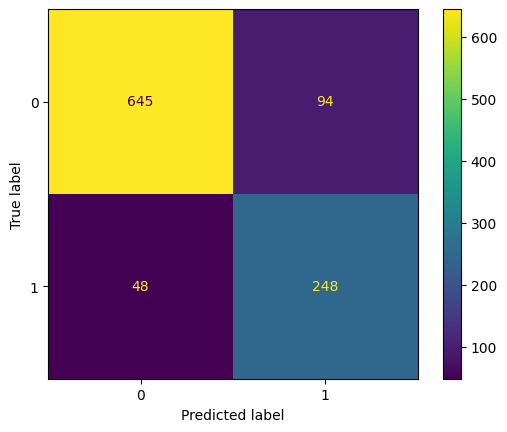

In [31]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn)

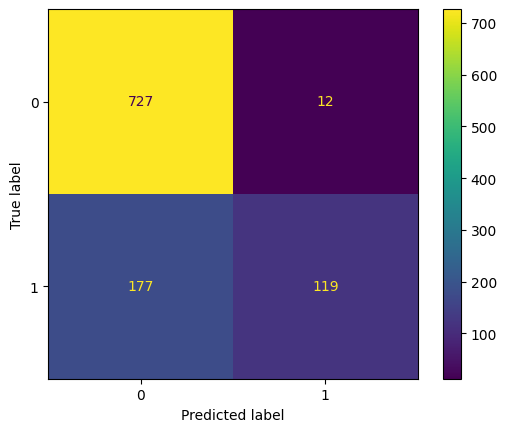

In [32]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm)

In [ ]:
# K-Nearest Neighbors (KNN):

# KNN is a simple, instance-based learning algorithm that classifies a data point based on the majority class of its k nearest neighbors.
# It calculates the distance (e.g., Euclidean) between the test point and each training point.
# KNN is intuitive and effective for small datasets but can be computationally expensive and less accurate with high-dimensional data, like text.
# Support Vector Machine (SVM):

# SVM is a supervised learning algorithm that aims to find the optimal hyperplane that maximally separates classes in a high-dimensional space.
# It is particularly effective for binary classification and high-dimensional data, as it can use different kernel functions (e.g., linear, RBF) to handle non-linear relationships.
# SVM is often preferred for text classification as it handles high-dimensionality well and typically yields good accuracy.